In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Derivadas aproximadas

Nem sempre é possível calcular a derivada de uma função.
Às vezes, a função em questão não é dada de forma explícita.
Por exemplo,
$$f(x) = \min_{|y| < x} \Big( \frac{\cos(2x^2 - 3y)}{20x - y}  \Big).$$

Assim, teremos que _estimar_ a derivada de $f$, sem calculá-la explicitamente.

A idéia principal é que
$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}, $$
ou seja, que a derivada é o limite do "quociente fundamental".
Podemos usar o computador para estimar este limite:

In [3]:
def df(f, x, h=1e-5):
    return (f(x+h) - f(x))/h

### Exercício: "Esta função é vetorial"?

Ou seja, se passarmos um vetor `x` em argumento, vai dar certo?
Em que condições?

### Exercício

Calcule a derivada do seno no intervalo $[0,7]$ por este método,
e compare com o resultado teórico.

[ 1.          0.99875001  0.99500367  0.98877033  0.98006558  0.96891118
  0.95533501  0.939371    0.92105905  0.90044493  0.87758016  0.85252191
  0.82533279  0.79608077  0.76483897  0.73168546  0.69670312  0.65997939
  0.62160605  0.58167902  0.5402981   0.49756671  0.45359167  0.40848288
  0.36235309  0.31531762  0.26749401  0.21900181  0.16996222  0.12049781
  0.07073221  0.02078983 -0.02920452 -0.07912587 -0.12884945 -0.17825098
 -0.22720696 -0.27559505 -0.3232943  -0.37018548 -0.41615138 -0.46107713
 -0.50485042 -0.54736185 -0.58850516 -0.62817751 -0.66627975 -0.70271663
 -0.73739709 -0.77023444 -0.80114661 -0.83005632 -0.85689133 -0.88158456
 -0.90407428 -0.92430429 -0.94222402 -0.95778867 -0.97095936 -0.98170316
 -0.9899932  -0.99580878 -0.99913536 -0.99996462 -0.99829448 -0.99412914
 -0.98747898 -0.97836064 -0.96679691 -0.9528167  -0.93645493 -0.91775252
 -0.8967562  -0.87351846 -0.84809738 -0.8205565  -0.79096465 -0.75939581
 -0.72592887 -0.69064748 -0.65363984 -0.61499843 -0

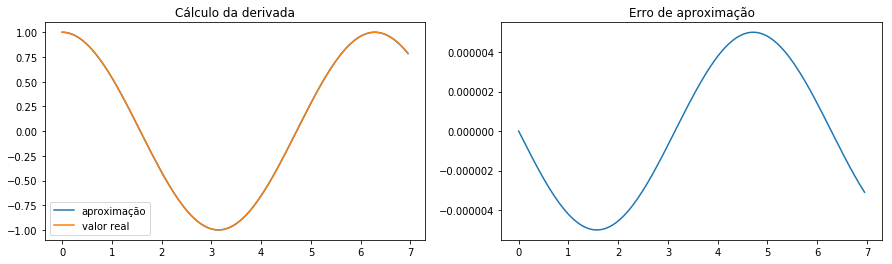

In [5]:
xs = np.arange(0, 7, 0.05)
### BEGIN SOLUTION
dfx = np.cos(xs)
dfx_approx = df(np.sin,xs)
print(dfx_approx)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,4))
ax1.set_title('Cálculo da derivada')
ax1.plot(xs, dfx_approx, label='aproximação')
ax1.plot(xs, dfx, label='valor real')
ax1.legend(loc='best')

ax2.set_title('Erro de aproximação')
ax2.plot(xs, dfx_approx - dfx)

plt.show()
### BEGIN SOLUTION

### Exercício

Muitas vezes, a função que vamos usar é "vetorial", como por exemplo `sin`, `exp`.
Mas às vezes não é tão simples escrever uma forma vetorial para uma função.
Nestes casos, não podemos usar tão diretamente as funções acima para fazer gráficos,
e em vez disso devemos construir as listas (ou, melhor, `array`s) nós mesmos.

Vejamos um exemplo:

Seja $y = f(t)$ a raiz de $t\cos(x) = x$.
Uma forma de calcular $f$ seria, por exemplo,
usando o método da bisseção.
Por exemplo:

In [12]:
def bissecaoStep(f,a,b):
    z = (a+b)/2
    #if f(z) == 0:
    #    return (z,z)
    np.array([(i,i) for i in z if f(i) == 0])
    if f(a)*f(z) < 0:
        return (a,z)
    else:
        return (z,b)

    ### - BASIC RECURSIVE BISSECTION - ###  ### CORRETA ###
def bissection(f, a, b, tol=1e-6, i=0):
    if (b-a) < tol:
        if abs(f((b+a)/2)) < abs(f(b)) and abs(f((b+a)/2)) < abs(f(a)):
            retv = (b+a)/2
        elif abs(f(b)) < abs(f(a)):
            retv = b
        else:
            retv = a
        return retv
    else:
        a, b = bissecaoStep(f, a, b)
        i += 1
        return bissection(f, a, b, i)

In [13]:
def f(t):
    def g(x):
        return t*np.cos(x) - x
    return bissection(g,-np.pi/2,np.pi/2, tol=1e-8)

Agora, escreva uma função `fvect` que recebe um array do numpy e retorna o array correspondente a todas as $f(t)$
para cada $t$ no array.

In [14]:
### Resposta aqui
def fvect(t):
    def g(x):
        return np.array([t*np.cos(x) - x])
    return bissection(g,-np.pi/2,np.pi/2, tol=1e-8)

E agora, veja o gráfico de f.

In [15]:
v = np.arange(-3,3,0.05)
plt.plot(v, fvect(v));
plt.show()

TypeError: 'float' object is not iterable

Com a ajuda da fvect, faça um gráfico da derivada de $f$.

In [ ]:
### Resposta aqui


## Estimando o erro

Uma atividade importante ao se construir um método numérico é calcular (ou ao menos estimar) o erro cometido.
Em geral, estimativas de erros são feitas com mais do que as hipóteses mínimas para o método.
Por exemplo, no caso do método de Newton, basta a função ser derivável para podermos usá-lo,
mas para mostrar convergência quadrática, temos que supor que ela terá duas derivadas,
e que o quociente $\frac{f''(\xi)}{2f'(x)}$ seja limitado no intervalo de convergência.

Vamos, então, seguir este padrão: queremos calcular a primeira derivada,
e para estimar o erro suporemos que a função é duas vezes derivável.
Assim:
$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \frac{\big(f(x) + h f'(x) + \frac{h^2}{2} f''(\xi) \big) - f(x)}{h} - f'(x)
   = \frac{h f''(\xi)}{2}.$$

No caso de $f(x) = \sin(x)$, o erro estará aproximadamente entre $h (-\sin(x))/2$ e $h (-\sin(x+h))/2$.
Vejamos o quão próximo isto é de fato:

In [ ]:
plt.title('Erro na estimativa do erro ("erro do erro")')
plt.plot(xs, (dfx_approx - dfx) - (- 1e-5 * np.sin(xs) / 2))
plt.show()

O exemplo anterior mostra que, se desejamos aproximar a derivada de uma função "bem-comportada" pelo quociente fundamental,
o erro será proporcional ao **passo** e à derivada segunda (que, em geral, não conhecemos!).
Assim, para diminuir o erro, teremos que diminuir igualmente o passo.
Mas isso pode resultar em erros de truncamento...

In [ ]:
dfx_approx_2 = df(np.sin,xs, h=1e-10)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,4))
ax1.set_title('Erro de aproximação')
ax1.plot(xs, dfx_approx_2 - dfx)

ax2.set_title('Erro na estimativa do erro')
ax2.plot(xs, (dfx_approx_2 - dfx) - (- 1e-10 * np.sin(xs)/2))
plt.show()

### Exercício: vendo o truncamento

Porque faz sentido, dados os gráficos acima,
atribuir o erro de aproximação à precisão numérica do computador,
e não à derivada segunda?

Note que o erro de aproximação não está mais proporcional a $\varepsilon$.
Para resolver isso, precisamos de um método de cálculo cujo erro seja menor!